#                                   Cleaning and Analysis of instrumented bicycle data

### Loading bicycle data: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_1 = pd.read_excel(r"C:\Users\ahmad\OneDrive\Documents\Study\Bicycle Traffic\Data Excel\SampleData.xlsx")
df_1

,Unnamed: 0,ID,interval,timestamp,latitude,longitude,altitude,distance,heartrate,cadence,speed,power
0,1,RW_0264,29,2023-07-13T13:37:10.000Z,5124243094,7151154801,2503999939,8.171000e+09,97,75,5.244000e+09,255
1,2,RW_0264,30,2023-07-13T13:37:11.000Z,5124239221,7151205428,2503999939,8.719000e+09,99,78,5.477000e+09,191
2,3,RW_0264,31,2023-07-13T13:37:12.000Z,5124235458,7151260497,2503999939,9.265000e+09,101,79,5.468000e+09,174
3,4,RW_0264,32,2023-07-13T13:37:13.000Z,5124231895,715131456,2506000061,9.829000e+09,103,80,5.636000e+09,159
4,5,RW_0264,33,2023-07-13T13:37:14.000Z,5124228073,7151373401,2506000061,1.038700e+09,105,81,5.580000e+09,118
...,...,...,...,...,...,...,...,...,...,...,...,...
657,658,RW_0264,686,2023-07-13T13:48:07.000Z,5124294341,7150283754,2523999939,3.009050e+09,154,0,2.697000e+09,0
658,659,RW_0264,687,2023-07-13T13:48:08.000Z,5124294181,7150281658,2521999969,3.009050e+09,154,0,0.000000e+00,0
659,660,RW_0264,688,2023-07-13T13:48:09.000Z,5124294156,7150281575,2521999969,3.009050e+09,154,0,0.000000e+00,0
660,661,RW_0264,689,2023-07-13T13:48:10.000Z,5124293972,7150285598,2521999969,3.009050e+09,153,0,0.000000e+00,0


There are some issues in the data. There are no decimal point (.) in the altitude, latitude, and longitude. Speed data is also looking out of format as it should be. Also, there is problem in the consistency of the data. Therefore cleaning data is necessary before further analysis. 

### Fixing GPS data, latutude, longitude, and altitude

The actual longitude, latitude and altitude of the location where data was acquired is 51.24, 7.15, and 250m. Therefore, proper decimal point is to be placed in these 3 columns of the dataframe. 

#### Correcting altitude column

In [2]:
df_1['altitude'] = df_1['altitude'].astype(str).str[:3] + '.' + df_1['altitude'].astype(str).str[3:]

df_1['altitude'] = df_1['altitude'].astype(float).apply(np.ceil).astype(int)


#### Correcting longitude and latitude column

In [3]:
# Convert the latitude values to strings
df_1['latitude'] = df_1['latitude'].astype(str)

# Format latitude values with a decimal point after the first two digits
df_1['latitude'] = df_1['latitude'].apply(lambda x: float(x[:2] + '.' + x[2:]))  # Convert to float first

# Display the DataFrame with formatted numerical values
pd.set_option('display.float_format', '{:.6f}'.format)

# Convert the longitude values to strings
df_1['longitude'] = df_1['longitude'].astype(str)

# Format longitude values with a decimal point after the first two digits
df_1['longitude'] = df_1['longitude'].apply(lambda x: float(x[:1] + '.' + x[1:]))  # Convert to float first

# Display the DataFrame with formatted numerical values
pd.set_option('display.float_format', '{:.6f}'.format)

#### Correcting speed column

In [4]:
# Convert 'speed' column to string and insert a decimal point after the first digit
df_1['speed'] = df_1['speed'].astype(str).apply(lambda x: str(int(float(x))) if '.' in x else x)
df_1['speed'] = df_1['speed'].apply(lambda x: x[0] + '.' + x[1:] if len(x) > 1 else x)

# Convert the 'speed' column back to a numeric type
df_1['speed'] = pd.to_numeric(df_1['speed'], errors='coerce')

# Save the updated DataFrame back to CSV
df_1.to_csv('bicycle_updated.csv', index=False)

#### Checking the dataframe again

In [5]:
df_1

,Unnamed: 0,ID,interval,timestamp,latitude,longitude,altitude,distance,heartrate,cadence,speed,power
0,1,RW_0264,29,2023-07-13T13:37:10.000Z,51.242431,7.151155,251,8170999908.000000,97,75,5.244000,255
1,2,RW_0264,30,2023-07-13T13:37:11.000Z,51.242392,7.151205,251,8719000244.000000,99,78,5.477000,191
2,3,RW_0264,31,2023-07-13T13:37:12.000Z,51.242355,7.151260,251,9265000153.000000,101,79,5.468000,174
3,4,RW_0264,32,2023-07-13T13:37:13.000Z,51.242319,7.151315,251,9829000092.000000,103,80,5.636000,159
4,5,RW_0264,33,2023-07-13T13:37:14.000Z,51.242281,7.151373,251,1038700027.000000,105,81,5.580000,118
...,...,...,...,...,...,...,...,...,...,...,...,...
657,658,RW_0264,686,2023-07-13T13:48:07.000Z,51.242943,7.150284,253,3009050049.000000,154,0,2.697000,0
658,659,RW_0264,687,2023-07-13T13:48:08.000Z,51.242942,7.150282,253,3009050049.000000,154,0,0.000000,0
659,660,RW_0264,688,2023-07-13T13:48:09.000Z,51.242942,7.150282,253,3009050049.000000,154,0,0.000000,0
660,661,RW_0264,689,2023-07-13T13:48:10.000Z,51.242940,7.150286,253,3009050049.000000,153,0,0.000000,0


### Visualization of altitude climbed, cadence speed, power, and heart rate within the time interval 

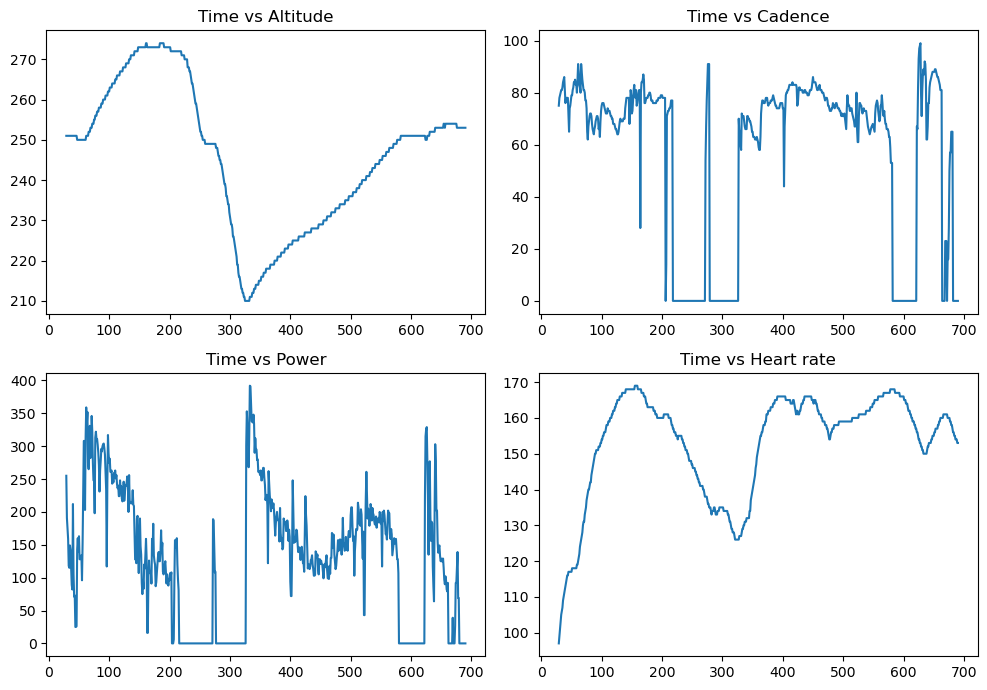

In [6]:

fig = plt.figure(figsize=(10, 7))
sub1 = fig.add_subplot(221)
sub1.set_title('Time vs Altitude') 
sub1.plot(df_1['interval'], df_1['altitude'])

sub1 = fig.add_subplot(222)
sub1.set_title('Time vs Cadence') 
sub1.plot(df_1['interval'], df_1['cadence'])

sub1 = fig.add_subplot(223)
sub1.set_title('Time vs Power') 
sub1.plot(df_1['interval'], df_1['power'])

sub1 = fig.add_subplot(224)
sub1.set_title('Time vs Heart rate') 
sub1.plot(df_1['interval'], df_1['heartrate'])

plt.tight_layout()
plt.show()

### Calculating Haversine speed

The haversine formula is a very accurate way of computing distances between two points on the surface of a sphere using the latitude and longitude of the two points. The haversine formula is a re-formulation of the spherical law of cosines, but the formulation in terms of haversines is more useful for small angles and distances.

#### The formula is 

$$
a = \sin^2\left(\frac{\Delta\text{lat}}{2}\right) + \cos(\text{lat}_1) \cdot \cos(\text{lat}_2) \cdot \sin^2\left(\frac{\Delta\text{lon}}{2}\right)
$$

$$
c = 2 \cdot \text{atan2}\left(\sqrt{a}, \sqrt{1-a}\right)
$$

$$
d = R \cdot c
$$

where:

\begin{align*}
&\text{lat}_1, \text{lon}_1 \text{ : Latitude and Longitude of the first point in radians,} \\
&\text{lat}_2, \text{lon}_2 \text{ : Latitude and Longitude of the second point in radians,} \\
&\Delta\text{lat} = \text{lat}_2 - \text{lat}_1 \text{ : Difference in latitude,} \\
&\Delta\text{lon} = \text{lon}_2 - \text{lon}_1 \text{ : Difference in longitude,} \\
&R \text{ : Radius of the Earth (mean value is often used, e.g., 6371.0 kilometers),} \\
&\sin, \cos, \text{ and } \text{atan2} \text{ : Trigonometric functions.}
\end{align*}

#### Function of Haversine distance and velocity calculation by using the distance 

In [7]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
   
    R = 6371.0

    # latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

def haversine_velocity(lat1, lon1, lat2, lon2, time_step):
    
    distance = haversine_distance(lat1, lon1, lat2, lon2)
    velocity = distance / time_step

    return velocity

#### For every time interval and the corresponding GPS location, Haversine speed is been calculated, and added to the dataframe as new column 'haversine speed'

In [8]:
df_1['haversine speed'] = 0.0

# Calculate speed for each consecutive pair of coordinates
for i in range(1, len(df_1)):
    lat1, lon1 = df_1.at[i - 1, 'latitude'], df_1.at[i - 1, 'longitude']
    lat2, lon2 = df_1.at[i, 'latitude'], df_1.at[i, 'longitude']
    time_step = df_1.at[i, 'interval'] - df_1.at[i - 1, 'interval']

    velocity = haversine_velocity(lat1, lon1, lat2, lon2, time_step)
    velocity_updated = velocity*1000
    df_1.at[i, 'haversine speed'] = velocity_updated
df_1

,Unnamed: 0,ID,interval,timestamp,latitude,longitude,altitude,distance,heartrate,cadence,speed,power,haversine speed
0,1,RW_0264,29,2023-07-13T13:37:10.000Z,51.242431,7.151155,251,8170999908.000000,97,75,5.244000,255,0.000000
1,2,RW_0264,30,2023-07-13T13:37:11.000Z,51.242392,7.151205,251,8719000244.000000,99,78,5.477000,191,5.564763
2,3,RW_0264,31,2023-07-13T13:37:12.000Z,51.242355,7.151260,251,9265000153.000000,101,79,5.468000,174,5.674779
3,4,RW_0264,32,2023-07-13T13:37:13.000Z,51.242319,7.151315,251,9829000092.000000,103,80,5.636000,159,5.464387
4,5,RW_0264,33,2023-07-13T13:37:14.000Z,51.242281,7.151373,251,1038700027.000000,105,81,5.580000,118,5.902418
...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,658,RW_0264,686,2023-07-13T13:48:07.000Z,51.242943,7.150284,253,3009050049.000000,154,0,2.697000,0,0.746236
658,659,RW_0264,687,2023-07-13T13:48:08.000Z,51.242942,7.150282,253,3009050049.000000,154,0,0.000000,0,0.230088
659,660,RW_0264,688,2023-07-13T13:48:09.000Z,51.242942,7.150282,253,3009050049.000000,154,0,0.000000,0,0.028393
660,661,RW_0264,689,2023-07-13T13:48:10.000Z,51.242940,7.150286,253,3009050049.000000,153,0,0.000000,0,0.346820


#### Now we will compare the speed data found by the sensor and Haversine speed calculated by the GPS points in every timesteps

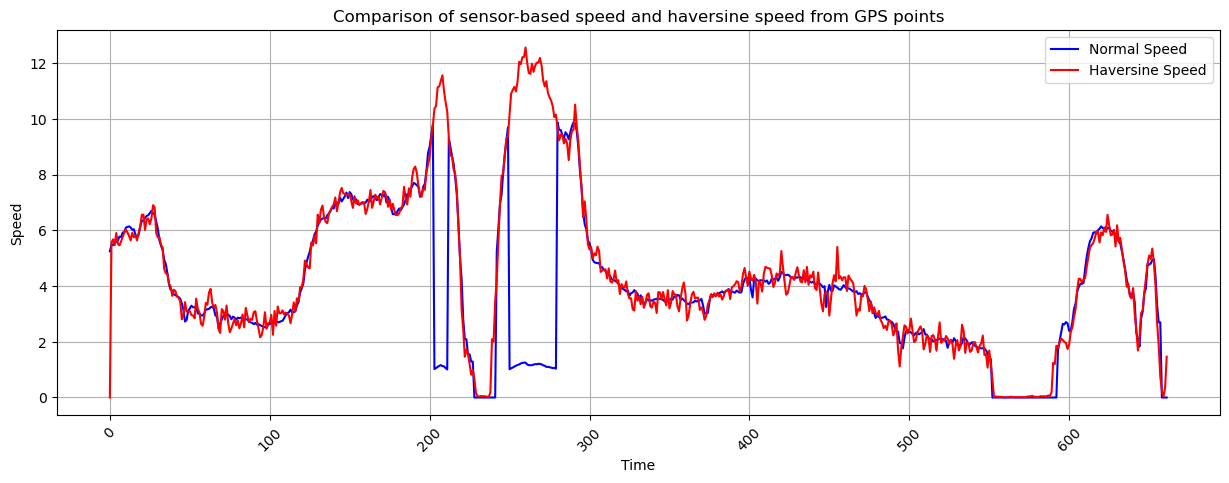

In [9]:
import matplotlib.pyplot as plt

# Assuming df_1 contains a column 'time' for timesteps and columns 'speed' and 'haversine_speed'
time_steps = range(0, len(df_1['interval']))
normal_speed = df_1['speed']
haversine_speed = df_1['haversine speed']  # Replace this with the actual column or data for Haversine speed

plt.figure(figsize=(15, 5))

# Plot the normal speed in blue
plt.plot(time_steps, normal_speed, label='Normal Speed', color='blue', linestyle='-')

# Plot the Haversine speed in red
plt.plot(time_steps, haversine_speed, label='Haversine Speed', color='red', linestyle='-')

# Add labels and a title
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Comparison of sensor-based speed and haversine speed from GPS points')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


It is identified that the haversine speed is almost similar to the sensor-based speed. However, two certain window was identified that showed opposite trend. That mean in these certain windows either of the speed sensor or the GPS sensor has provided us with wrong data. 

### Smoothing speed data

To overcome the erratic behavior of the data smoothing is needed. Here, Gaussian smoothing was performed. Haversine data showed rather much erratic behavior than the sensor-based speed. After smoothing is done, both the speed profile is visualized here in this section. 

In [10]:
import numpy as np
from scipy.ndimage import gaussian_filter1d

def gaussian_smooth_speed(speed, window_size):
    # Use a Gaussian filter to smooth the speed data
    smoothed_speed = gaussian_filter1d(speed, sigma=window_size/6)

    return smoothed_speed

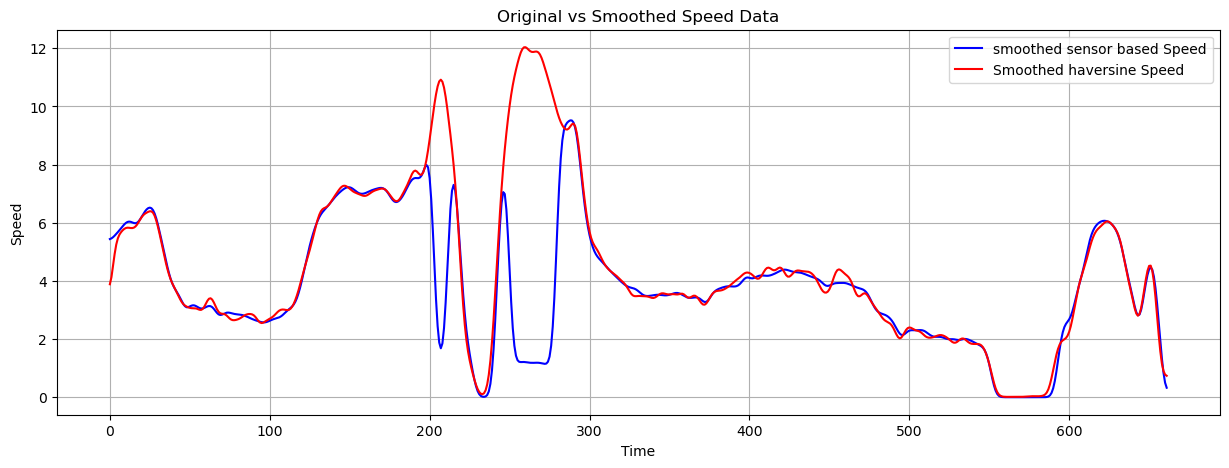

In [11]:
speed_data = df_1['speed']
haversine_speed_data = df_1['haversine speed']
window_size = 15

# Apply Gaussian smoothing to the speed data
smooth_speed_data = gaussian_smooth_speed(speed_data, window_size)
smooth_haversine_speed_data = gaussian_smooth_speed(haversine_speed_data, window_size)

plt.figure(figsize=(15, 5))
plt.plot(smooth_speed_data, label='smoothed sensor based Speed', color='blue', linestyle='-')
plt.plot(smooth_haversine_speed_data, label='Smoothed haversine Speed ', color='red', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Original vs Smoothed Speed Data')
plt.legend()
plt.grid(True)
plt.show()

### Determinig terrain types

There are three types of terrains: Flat, Uphill, and Downhill. In this section it will be determined that which GPS points are belong to either of these terrain types. To do so we are using ML framework called random forest to classify the terrain types. 

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Create new binary features indicating trend in speed and altitude
df_1['speed_increasing'] = (df_1['haversine speed'].diff() > 0).astype(int)
df_1['speed_decreasing'] = (df_1['haversine speed'].diff() < 0).astype(int)
df_1['altitude_increasing'] = (df_1['altitude'].diff() > 0).astype(int)
df_1['altitude_decreasing'] = (df_1['altitude'].diff() < 0).astype(int)

df_1['uphill'] = ((df_1['haversine speed'].diff() < 0) & (df_1['altitude'].diff() > 0)).astype(int)
df_1['downhill'] = ((df_1['haversine speed'].diff() > 0) & (df_1['altitude'].diff() < 0)).astype(int)

df_1['terrain_type'] = 'flat'
df_1.loc[df_1['uphill'] == 1, 'terrain_type'] = 'uphill'
df_1.loc[df_1['downhill'] == 1, 'terrain_type'] = 'downhill'
# Features (X)
X = df_1[['haversine speed', 'altitude', 'uphill', 'downhill', 'power', 'heartrate' ]]

# Target variable (y)
y = df_1['terrain_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Create a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Assuming y_test and y_pred are your true and predicted labels
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

    downhill       1.00      1.00      1.00        16
        flat       1.00      1.00      1.00       353
      uphill       1.00      1.00      1.00        29

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



This model has 99 percent accuracy. The number of test data was 80 percent, and labelled data was 20 percent. Out of 530 GPS points 21 belongs to downhill riding, 35 belong to uphill and 474 points belong to flat riding. 

### Visualizing GPS points and the terrain types

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


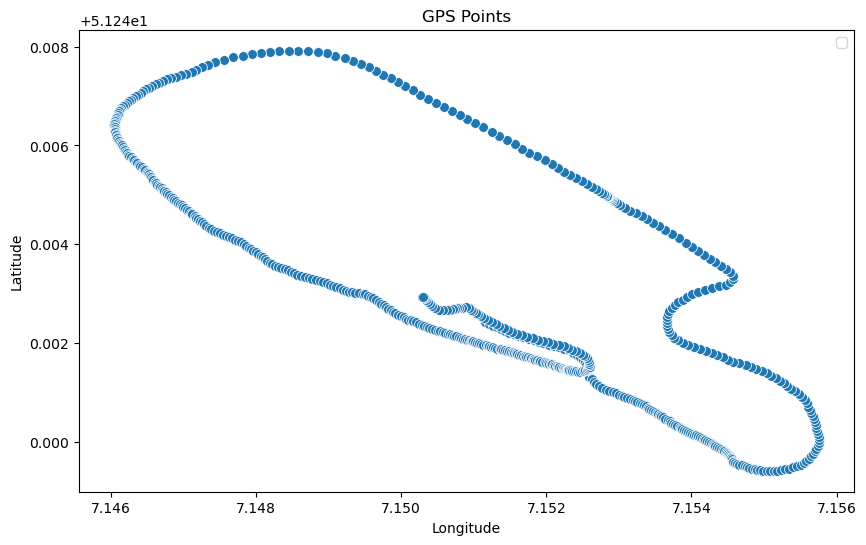

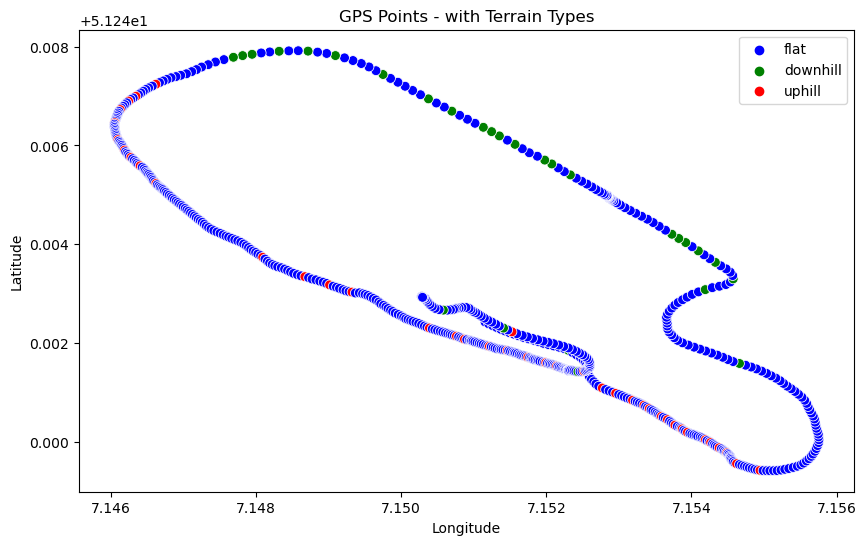

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for all GPS points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data = df_1, s=50)
plt.title('GPS Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Scatter plot for all terrain types
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='terrain_type', data=df_1, palette={'flat': 'blue', 'uphill': 'red', 'downhill': 'green'}, s=50)
plt.title('GPS Points - with Terrain Types')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

